In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
with open('data1.txt', 'r') as f:
    data = np.loadtxt(f)

df = pd.DataFrame(data)

df

,0,1
0,3.225873,2.364943
1,1.675432,4.537079
2,3.639244,2.209676
3,1.789325,3.911848
4,3.284355,1.657067
5,2.055332,4.219813
6,3.158722,2.730478
7,1.675897,4.114203
8,2.699073,1.867362
9,1.547231,4.238407


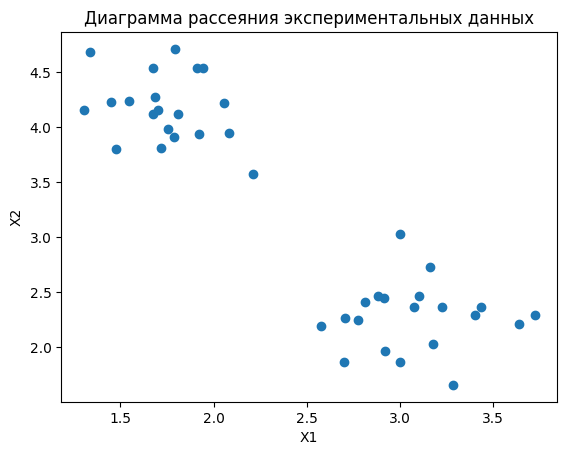

In [30]:
plt.scatter(df[0], df[1])
plt.title('Диаграмма рассеяния экспериментальных данных')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [31]:
def kmeans(data, n, max_iter = 1000, t = 1e-5):
    
    centroids = data.sample(n = n, replace = False)
    prev_s = None
    
    for i in range(max_iter):
        # рассчет расстояний
        distances = np.sqrt(((data - centroids.iloc[0]) ** 2).sum(axis = 1))
        labels = np.zeros(len(data))
        
        for i in range(1, n):
            dist = np.sqrt(((data - centroids.iloc[i]) ** 2).sum(axis = 1))
            labels[dist < distances] = i
            distances[dist < distances] = dist[dist < distances]
        
        # сумма расстояний до центра кластеров
        s = 0
        for i in range(n):
            s += distances[i].sum()
        
        if prev_s is not None and abs(s - prev_s) < t:
            break
        
        prev_s = s
        
        # Recount centroids
        new_centroids = pd.DataFrame([data[labels == i].mean(axis = 0) for i in range(n)])
        centroids = new_centroids
        
        yield labels, centroids

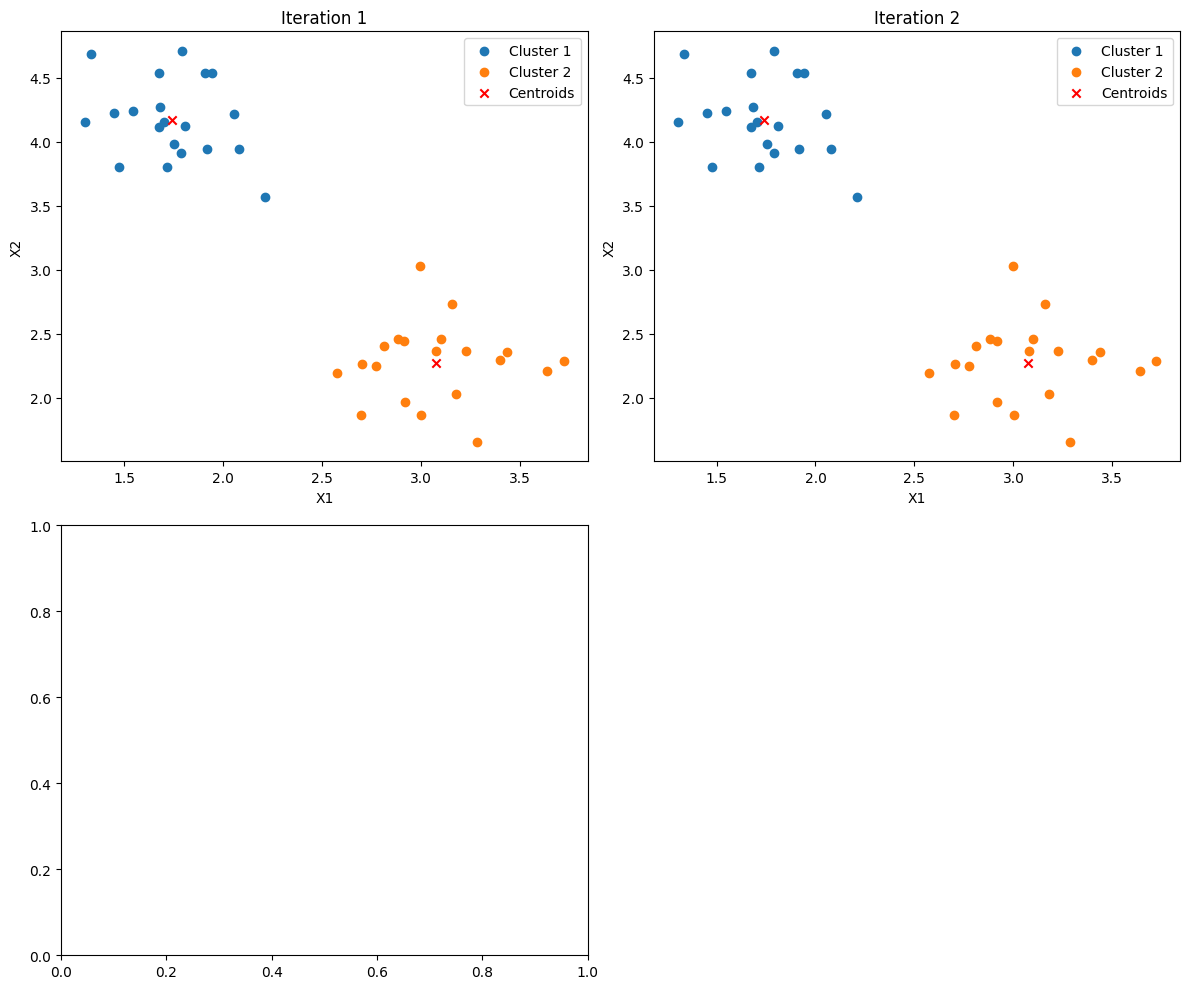

In [32]:
clusters_num = 2
kmeans_gen = kmeans(df, clusters_num)

num_plots = len(list(kmeans_gen))
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))
axes = axes.flatten()

kmeans_gen = kmeans(df, clusters_num)

for i, (labels, centroids) in enumerate(kmeans_gen):
    for cluster in range(clusters_num):
        axes[i].scatter(df.iloc[labels == cluster, 0], 
                        df.iloc[labels == cluster, 1], 
                        label = f'Cluster {cluster + 1}')
    
    axes[i].scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='x', color='red', label='Centroids')
    axes[i].set_xlabel("X1")
    axes[i].set_ylabel("X2")
    axes[i].set_title(f'Iteration {i + 1}')
    axes[i].legend()

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()